# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** GMM = Gaussian Mixture Model for clustering

<br></font>
</div>

# Import modules

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from sklearn import mixture
from matplotlib.patches import Ellipse

# Theoretical recal: from k-means to GMM

<div class="alert alert-block alert-info">
<font color=black><br>

- k-means **drawbacks**:
    - Lack of flexibility in cluster shape 
    - Lack of probabilistic cluster assignment


- Possible **solutions**:
    - You could measure uncertainty in cluster assignment by comparing the distances of each point to all cluster centres, rather than focusing on just the closest. 
    - You might also imagine allowing the cluster boundaries to be ellipses rather than circles, so as to account for noncircular clusters. 

- It turns out that these are two essential components of the GMM clustering model. 

<br></font>
</div>

# Create synthetic dataset

In [2]:
X, y_true = make_blobs(n_samples=400, centers=4,
# flip axes for better plotting
cluster_std=0.60, random_state=0)
X = X[:, ::-1] 

# K-means

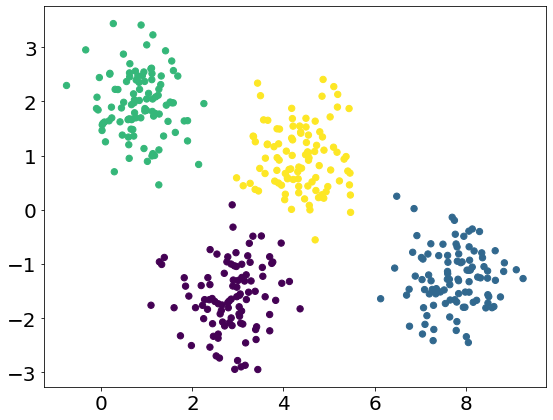

In [3]:
# Plot the data with k-means labels
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
rcParams['figure.figsize'] = 9, 7
rcParams['font.size'] = 20
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

# GMM

<div class="alert alert-block alert-info">
<font color=black><br>

-  A Gaussian mixture model = GMM
- GMM attempts to find a mixture of multidimensional Gaussian probability distributions that best model any input dataset. 

<br></font>
</div>

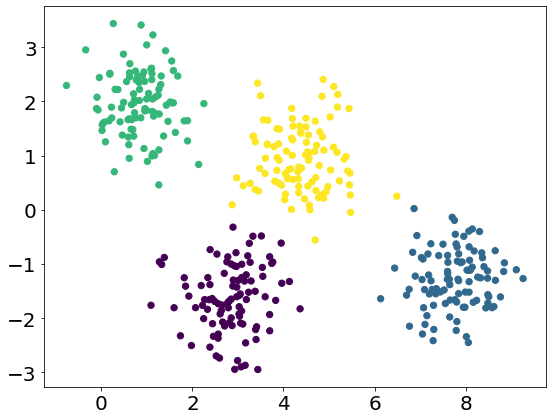

In [5]:
model = mixture.GaussianMixture(n_components=4, covariance_type='full')
model.fit(X)
labels = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

# How is the probabilistic nature helpful here?

<div class="alert alert-block alert-info">
<font color=black><br>

- Because GMM contains a probabilistic model under the hood, it is also possible to find **probabilistic cluster assignments**.<br>
- In ScikitLearn we do this using the **predict_proba** method. 
- This returns a matrix of size [n_samples, n_clusters] that measures the probability that any point belongs to the given cluster:

<br></font>
</div>

In [7]:
probs = model.predict_proba(X) 
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


# Plotting the GMM boundaries

<div class="alert alert-block alert-info">
<font color=black><br>

- The result of this is that each cluster is associated **not with** a hard-edged sphere, **but with** a smooth Gaussian model.

<br></font>
</div>

In [9]:
def draw_ellipse(position, covariance, ax=None, **kwargs): 
    """Draw an ellipse with a given position and covariance"""
    
    ax = ax or plt.gca()
            # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0])) 
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [10]:
def plot_gmm(gmm, X, label=True, ax=None): 
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2) 
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

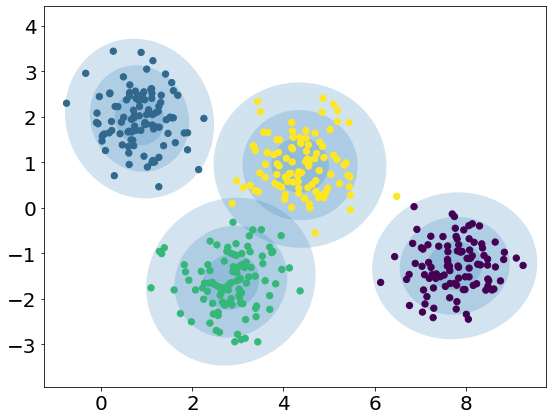

In [11]:
plot_gmm(model, X)

In [12]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

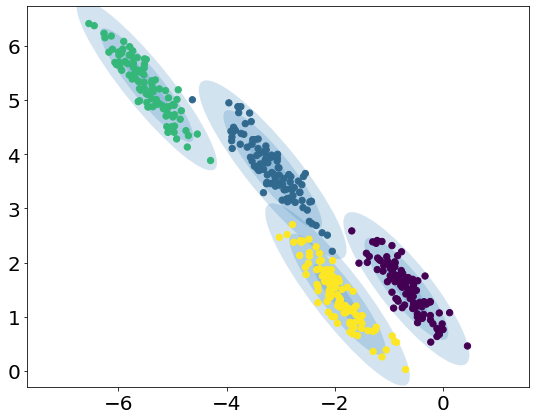

In [13]:
plot_gmm(model, X_stretched)

# References

<div class="alert alert-warning">
<font color=black>

- VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
- [New API for GMM](https://stackoverflow.com/questions/55799601/problem-with-gmm-library-from-sklear-mixture/59292632)
- https://github.com/jakevdp/PythonDataScienceHandbook
    
</font>
</div>

# Conclusions

<div class="alert alert-block alert-danger">
<font color=black><br>

- Because GMM contains a probabilistic model under the hood, it is also possible to find **probabilistic cluster assignments**.<br>

<br></font>
</div>